In [55]:
from scipy.optimize import least_squares
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt




In [73]:
Sus_full_base = [226266983,
226210601,
226151639,
226099991,
226055208,
226007192,
225952799,
225892946,
225827593,
225757129,
225704368,
225656486,
225591046,
225530452,
225466215,
225391085,
225305788,
225227209,
225167494,
225092856,
225018469,
224936587,
224845918,
224746050,
224661843,
224587648,
224493642,
224401226,
224293148,
224171799,
224038976,
223913045,
223809632,
223679183,
223539433,
223396555,
223232904,
223051408,
222892375,
222757189,
222590626,
222428995,
222256715,
222069207,
221870348,
221698415,
221557621,
221377998,
221200140,
221019550,
220916556,
220710717,
220559309,
220423187,
220255529,
220071301,
219870129,
219652391,
219421023,
219215315,
219043394,
218838871,
218619157,
218399441,
218174216,
217893703,
217686171,
217501952,
217301067,
217097914,
216853087,
216615378,
216364188,
216170283,
215990372,
215788854,
215587217,
215359454,
215165943,
215065012,
214848151,
214696062,
214507052,
214306022,
214077073,
213846049,
213698801,
213407191,
213205411,
212953581,
212718565,
212462599,
212182265,
211881488,
211629569,
211421274,
211194958,
210964981,
210735656,
210496134,
210256281,
210054088,
209883994,
209742861,
209555917,
209370429,
209179947,
208988382,
208820465,
208690789,
208534213,
208383575,
208227805,
208061630,
207897015,
207763215,
207649420,
207507566,
207392310,
207272127,
207146491,
207016990,
206912043,
206824762,
206731780,
206635390,
206540415,
206434775,
206335148,
206250496,
206186716,
206131444,
206066904,
205996743,
205924952,
205846940,
205777220,
205722040,
205662574,
205590661,
205516467,
205438586,
205360268,
205297594,
205246689,
205189993,
205132349,
205065737,
204998455,
204932760,
204876175,
204836111,
204741598,
204685699,
204627504,
204565117,
204500951,
204451394,
204413405,
204356241,
204301710,
204242779,
204182309,
204121686,
204067261,
]

Infected_full_base = [53017,
109399,
168361,
220009,
264792,
312808,
367201,
427054,
492407,
562871,
615632,
663514,
728954,
789548,
853785,
928915,
1014212,
1092791,
1152506,
1227144,
1301531,
1383413,
1474082,
1573950,
1658157,
1732352,
1826358,
1918774,
2026852,
2148201,
2281024,
2406955,
2510368,
2640817,
2780567,
2923445,
3087096,
3268592,
3427625,
3562811,
3729374,
3891005,
4063285,
4250793,
4449652,
4621585,
4762379,
4942002,
5119860,
5300450,
5403444,
5609283,
5760691,
5896813,
6064471,
6248699,
6449871,
6667609,
6898977,
7104685,
7276606,
7481129,
7700843,
7920559,
8145784,
8426297,
8633829,
8818048,
9018933,
9222086,
9466913,
9704622,
9955812,
10149717,
10329628,
10531146,
10732783,
10960546,
11154057,
11254988,
11471849,
11623938,
11812948,
12013978,
12242927,
12473951,
12621199,
12912809,
13114589,
13366419,
13601435,
13857401,
14137735,
14438512,
14690431,
14898726,
15125042,
15355019,
15584344,
15823866,
16063719,
16265912,
16436006,
16577139,
16764083,
16949571,
17140053,
17331618,
17499535,
17629211,
17785787,
17936425,
18092195,
18258370,
18422985,
18556785,
18670580,
18812434,
18927690,
19047873,
19173509,
19303010,
19407957,
19495238,
19588220,
19684610,
19779585,
19885225,
19984852,
20069504,
20133284,
20188556,
20253096,
20323257,
20395048,
20473060,
20542780,
20597960,
20657426,
20729339,
20803533,
20881414,
20959732,
21022406,
21073311,
21130007,
21187651,
21254263,
21321545,
21387240,
21443825,
21483889,
21578402,
21634301,
21692496,
21754883,
21819049,
21868606,
21906595,
21963759,
22018290,
22077221,
22137691,
22198314,
22252739,]

165


In [57]:
Sus_full = [element/226266983 for element in Sus_full_base]
Infected_full = [element/226266983 for element in Infected_full_base]
Total_days_full = [i for i in range(0,len(Sus_full))]

In [87]:
S0 = 1  # Initial number of susceptible individuals
I0 = 53017/226266983  # Initial number of infected individuals
Y0 = [S0, I0]

tstep = 0.01


def covid(t, U, beta, nu):
    S, I = U
    dSdt = -beta * S * I
    dIdt = beta * S * I - nu * I
    return [dSdt, dIdt]

def residue(paras):
    beta, nu = paras
    sol = solve_ivp(
        lambda t, U: covid(t, U, beta, nu),
        t_span=(0, Total_days_full[-1] + 1),
        y0=Y0,
        t_eval=Total_days_full,
        vectorized=True,
        dense_output=True
    )
    S_res = Sus_full - sol.y[0]
    I_res = Infected_full - sol.y[1]
    return np.concatenate([S_res, I_res])

initial_guess = [0.5, 0.1]

In [88]:
opt_para = least_squares(residue, initial_guess)

In [92]:
beta_opt, nu_opt = opt_para.x
print("beta optimized is: " + str(opt_para.x[0])[0:8])
print("nu optimized is: " + str(opt_para.x[1])[0:8])

t_eval = 700

sol_optimized = solve_ivp(
    lambda t, U: covid(t, U, beta_opt, nu_opt),
    t_span=(0, t_eval),
    y0=Y0,
    t_eval=np.arange(0, t_eval, tstep),
    vectorized=True
)

beta optimized is: 0.601950
nu optimized is: 0.567311


In [93]:

S = sol_optimized.y[0]  # Susceptibles
I = sol_optimized.y[1]  # Infected
T = sol_optimized.t     # Time

R_0 = 1/nu_opt * beta_opt
print("The R_0 value is: " + str(R_0)[0:6])

p = 1 - 1/R_0

print(str(p*100)[0:6] + "%")

minimum_vac = p*100
print("minimum needed to be vaccinated: " + str(minimum_vac)[0:6] + "%")

max_infected = max(I)

print("the maximum number of infected predicted to be alive at the same time was: " + str(int(max_infected*Sus_full_base[0])))

The R_0 value is: 1.0610
5.7545%
minimum needed to be vaccinated: 5.7545%
the maximum number of infected predicted to be alive at the same time was: 439667


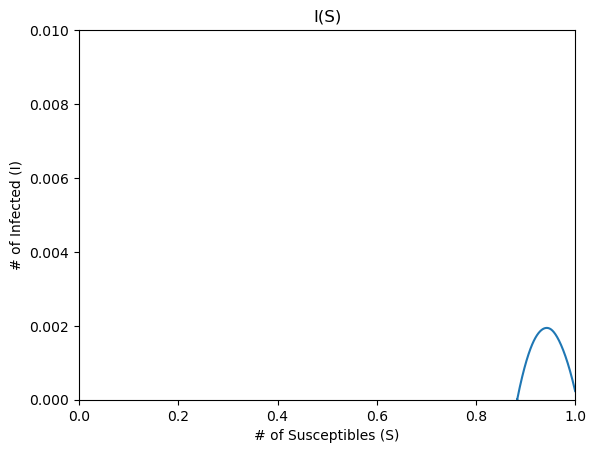

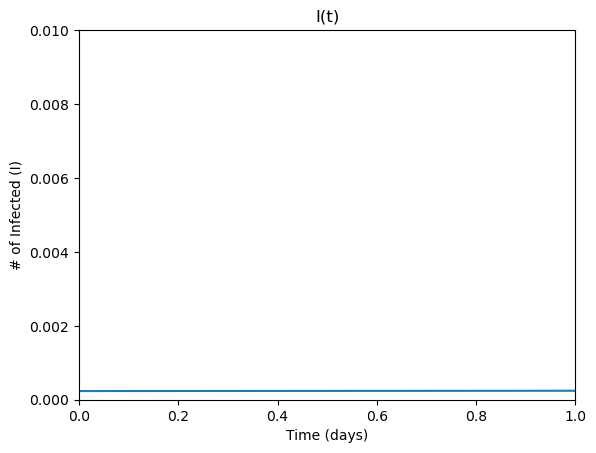

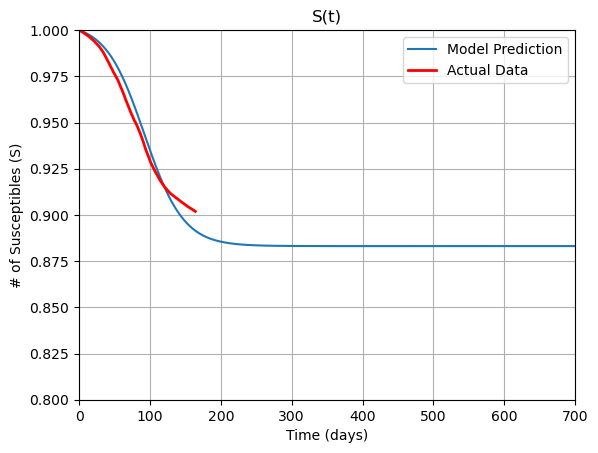

In [94]:

plt.figure()
plt.plot(S, I)
plt.xlabel('# of Susceptibles (S)')
plt.ylabel('# of Infected (I)')
plt.title('I(S)')
plt.axis([0, 1, 0, .01])
plt.show()

plt.figure()
plt.plot(T, I)
plt.xlabel('Time (days)')
plt.ylabel('# of Infected (I)')
plt.title('I(t)')
plt.axis([0, 1, 0, .01])
plt.show()

plt.figure()
plt.plot(T, S, label="Model Prediction")
plt.plot(Total_days_full, Sus_full, color='red', linestyle='-', label="Actual Data", linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('# of Susceptibles (S)')
plt.axis([0, t_eval, 0.8, 1])  
plt.title('S(t)')
plt.legend()
plt.grid(True)